In [19]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [20]:
with open("./data/text_generation.txt", encoding="utf-8") as f:
    text = f.read()

In [21]:
len(text)

7246

In [22]:
import re

def clean_text(text):
  text = re.sub(r',', '', text)
  text = re.sub(r'\'', '',  text)
  text = re.sub(r'\"', '', text)
  text = re.sub(r'\(', '', text)
  text = re.sub(r'\)', '', text)
  text = re.sub(r'\n', '', text)
  text = re.sub(r'“', '', text)
  text = re.sub(r'”', '', text)
  text = re.sub(r'’', '', text)
  text = re.sub(r'\.', '', text)
  text = re.sub(r';', '', text)
  text = re.sub(r':', '', text)
  text = re.sub(r'\-', '', text)

  return text

In [23]:
lowercase_text = text.lower()

split = lowercase_text.splitlines()

In [24]:
split[:10]

['two roads diverged in a yellow wood,',
 'and sorry i could not travel both',
 'and be one traveler, long i stood',
 'and looked down one as far as i could',
 'to where it bent in the undergrowth;',
 '',
 'then took the other, as just as fair,',
 'and having perhaps the better claim,',
 'because it was grassy and wanted wear;',
 'though as for that the passing there']

In [25]:
final_text = ""

for line in split:
    line = clean_text(line)
    final_text += "\n" + line

In [26]:
print(final_text[:200])


two roads diverged in a yellow wood
and sorry i could not travel both
and be one traveler long i stood
and looked down one as far as i could
to where it bent in the undergrowth

then took the other a


In [27]:
final_text = final_text.split("\n")
print(final_text[:10])

['', 'two roads diverged in a yellow wood', 'and sorry i could not travel both', 'and be one traveler long i stood', 'and looked down one as far as i could', 'to where it bent in the undergrowth', '', 'then took the other as just as fair', 'and having perhaps the better claim', 'because it was grassy and wanted wear']


In [28]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [29]:
max_vocab = 1000
tokenizer = Tokenizer(num_words=max_vocab, oov_token="<OOV>")
tokenizer.fit_on_texts(final_text)

In [30]:
word2idx = tokenizer.word_index

In [34]:
word2idx["the"]

2

In [35]:
print(f"The length of the word2idx dictionary is {len(word2idx)}")

The length of the word2idx dictionary is 545


In [36]:
vocab_size = len(word2idx) + 1
print(f"The vocab size is {vocab_size}")

The vocab size is 546


In [38]:
input_seq = []

for line in final_text:
    token_list = tokenizer.texts_to_sequences([line])[0]
    
    for i in range(1, len(token_list)):
        n_gram_seq = token_list[:i+1]
        input_seq.append(n_gram_seq)

In [41]:
input_seq[:10]

[[113, 114],
 [113, 114, 115],
 [113, 114, 115, 8],
 [113, 114, 115, 8, 6],
 [113, 114, 115, 8, 6, 191],
 [113, 114, 115, 8, 6, 191, 76],
 [4, 192],
 [4, 192, 5],
 [4, 192, 5, 16],
 [4, 192, 5, 16, 13]]

In [42]:
max_seq_length = max(len(x) for x in input_seq)
print(f"The maximum token in a sequence is {max_seq_length}")

The maximum token in a sequence is 11


In [43]:
input_seq = pad_sequences(input_seq, maxlen=max_seq_length, padding="pre")

In [45]:
input_seq[:10]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0, 113, 114],
       [  0,   0,   0,   0,   0,   0,   0,   0, 113, 114, 115],
       [  0,   0,   0,   0,   0,   0,   0, 113, 114, 115,   8],
       [  0,   0,   0,   0,   0,   0, 113, 114, 115,   8,   6],
       [  0,   0,   0,   0,   0, 113, 114, 115,   8,   6, 191],
       [  0,   0,   0,   0, 113, 114, 115,   8,   6, 191,  76],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4, 192],
       [  0,   0,   0,   0,   0,   0,   0,   0,   4, 192,   5],
       [  0,   0,   0,   0,   0,   0,   0,   4, 192,   5,  16],
       [  0,   0,   0,   0,   0,   0,   4, 192,   5,  16,  13]])

In [46]:
input_seq = np.array(input_seq)
input_seq[:10]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0, 113, 114],
       [  0,   0,   0,   0,   0,   0,   0,   0, 113, 114, 115],
       [  0,   0,   0,   0,   0,   0,   0, 113, 114, 115,   8],
       [  0,   0,   0,   0,   0,   0, 113, 114, 115,   8,   6],
       [  0,   0,   0,   0,   0, 113, 114, 115,   8,   6, 191],
       [  0,   0,   0,   0, 113, 114, 115,   8,   6, 191,  76],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4, 192],
       [  0,   0,   0,   0,   0,   0,   0,   0,   4, 192,   5],
       [  0,   0,   0,   0,   0,   0,   0,   4, 192,   5,  16],
       [  0,   0,   0,   0,   0,   0,   4, 192,   5,  16,  13]])

In [47]:
xs = input_seq[:, :-1] # contain every word in a line sentence except last word in a sentence.
labels = input_seq[:, -1] # contain the last word in a sentence.

In [50]:
xs[:10], labels[:10]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0, 113],
        [  0,   0,   0,   0,   0,   0,   0,   0, 113, 114],
        [  0,   0,   0,   0,   0,   0,   0, 113, 114, 115],
        [  0,   0,   0,   0,   0,   0, 113, 114, 115,   8],
        [  0,   0,   0,   0,   0, 113, 114, 115,   8,   6],
        [  0,   0,   0,   0, 113, 114, 115,   8,   6, 191],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4],
        [  0,   0,   0,   0,   0,   0,   0,   0,   4, 192],
        [  0,   0,   0,   0,   0,   0,   0,   4, 192,   5],
        [  0,   0,   0,   0,   0,   0,   4, 192,   5,  16]]),
 array([114, 115,   8,   6, 191,  76, 192,   5,  16,  13]))

In [51]:
from tensorflow.keras.utils import to_categorical

In [52]:
ys = to_categorical(labels, num_classes=vocab_size)

In [59]:
len(ys[2])

546

In [60]:
from tensorflow.keras.layers import Input, Dense, Embedding, LSTM, Dropout, Bidirectional, GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

In [61]:
i = Input(shape=(max_seq_length -1,))
x = Embedding(vocab_size, 124)(i)
x = Dropout(0.2)(x)
x = LSTM(520, return_sequences=True)(x)
x = Bidirectional(layer=LSTM(340, return_sequences=True))(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1025, activation="relu")(x)
x = Dense(vocab_size, activation="softmax")(x)

model = Model(i, x)

In [65]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [66]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 10, 124)        │        67,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10, 124)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 10, 520)        │     1,341,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 10, 680)        │     2,341,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 680)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1025)           │       698,025 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 546)            │       560,196 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,009,445 (19.11 MB)

 Trainable params: 5,009,445 (19.11 MB)

 Non-trainable params: 0 (0.00 B)

In [67]:
model_result = model.fit(xs, ys, epochs=100, verbose=1)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.0327 - loss: 6.1610
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.0417 - loss: 5.8051
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.0396 - loss: 5.7712
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.0508 - loss: 5.6521
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.0497 - loss: 5.6956
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.0515 - loss: 5.5979
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.0629 - loss: 5.4707
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.0558 - loss: 5.2793
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.0636 - loss: 5.2095
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.0670 - loss: 5.1943
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.0793 - loss: 4.8407
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step

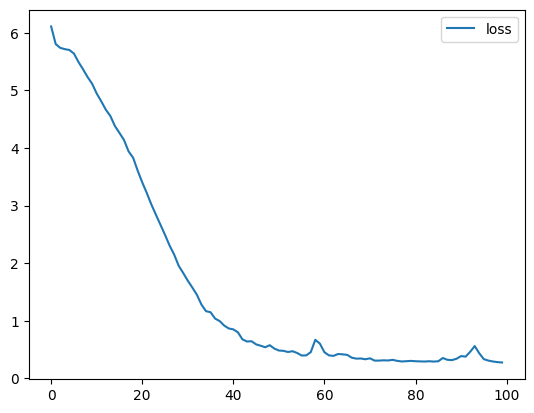

In [75]:
import matplotlib.pyplot as plt

plt.plot(model_result.history["loss"], label="loss")
plt.legend()

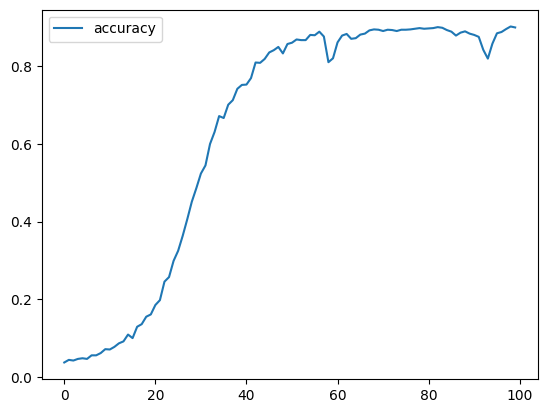

In [76]:
plt.plot(model_result.history["accuracy"], label="accuracy")
plt.legend()

In [115]:
token_list = tokenizer.texts_to_sequences(["i am feeling good today hello there"])[0]

In [116]:
token_list = pad_sequences([token_list], maxlen=max_seq_length-1, padding="pre")
token_list

array([[  0,   0,   0,   5,   1,   1, 100,   1,   1,  28]])

In [117]:
predicted = model.predict(token_list)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [118]:
predicted = np.argmax(predicted, axis=1)    

In [119]:
predicted

array([11], dtype=int64)

In [120]:
for word, index in tokenizer.word_index.items():
    if predicted == index:
        print(word)
        break

was


In [124]:
def predict_words(seed_word, max_tokens=20):
    for _ in range(max_tokens):
        token_list = tokenizer.texts_to_sequences([seed_word])[0]
        token_list = pad_sequences([token_list], maxlen=max_seq_length-1, padding="pre")
        predicted = model.predict(token_list, verbose=0)
        predicted = np.argmax(predicted, axis=1)
        for word, index in tokenizer.word_index.items():
            if predicted == index:
                seed_word += " " + word
                break
        print(seed_word)
    return seed_word

In [ ]:
predicted_text = predict_words("the", max_tokens=15)

the wind
the wind once
the wind once blew
the wind once blew itself
the wind once blew itself untaught
the wind once blew itself untaught cut
the wind once blew itself untaught cut cut
the wind once blew itself untaught cut cut cut
the wind once blew itself untaught cut cut cut shells
the wind once blew itself untaught cut cut cut shells shells
the wind once blew itself untaught cut cut cut shells shells are
the wind once blew itself untaught cut cut cut shells shells are hair
the wind once blew itself untaught cut cut cut shells shells are hair trees
the wind once blew itself untaught cut cut cut shells shells are hair trees again
the wind once blew itself untaught cut cut cut shells shells are hair trees again on


In [ ]:
predicted_text

'The wind once blew itself untaught cut cut cut shells shells are hair trees again on'